<a href="https://colab.research.google.com/github/garjita63/Data-Science/blob/main/How_to_build_a_simple_sentiment_analysis_using_Tensorflow_Hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import os

from absl import logging

In [2]:
# load all the files in DataFrame
def load_directory_and_data(directory):
  data = {}
  data['sentence'] = []
  data['sentiment'] = []
  for file_path in os.listdir(directory):
    with tf.io.gfile.GFile(os.path.join(directory, file_path),'r') as f:
      data['sentence'].append(f.read())
      data['sentiment'].append(re.match('\d+_(\d+)\.txt',file_path).group(1))
  return pd.DataFrame.from_dict(data)

# merging positive and negative examples
def load_dataset(directory):
  pos_df = load_directory_and_data(os.path.join(directory,'pos'))
  neg_df = load_directory_and_data(os.path.join(directory,'neg'))
  pos_df['polarity'] = 1
  neg_df['polarity'] = 0
  return pd.concat([pos_df,neg_df]).sample(frac=1).reset_index(drop=True)

# download and process files
def download_load_dataset(force_download=False):
  dataset = tf.keras.utils.get_file(fname='aclImdb.tar.gz',
                                    origin='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
                                    extract=True)
  train_df = load_dataset(os.path.join(os.path.dirname(dataset),
                                       'aclImdb','train'))
  test_df = load_dataset(os.path.join(os.path.dirname(dataset),
                                      'aclImdb','test'))
  return train_df,test_df

#reduce logging output
logging.set_verbosity(logging.ERROR)

train_df,test_df = download_load_dataset()
train_df.head(10)

84140032/84125825 [==============================] - 2s 0us/step


,sentence,sentiment,polarity
0,Not to be confused with the British black come...,7,1
1,'They All Laughed' is a superb Peter Bogdanovi...,10,1
2,This movie is by far the worst movie ever made...,1,0
3,I really looked forward to this program for tw...,2,0
4,"This ""tragicomedy"" written by famous Serbian t...",10,1
5,I am a fan of the previous Best of the Best fi...,1,0
6,"While Leon is cute on SNL, he's only on for a ...",2,0
7,"Victor McLaglen, the title character of John F...",8,1
8,In this excellent Twentieth-Century Fox film-n...,9,1
9,I saw this movie as a teenager and immediately...,10,1


### model

In [3]:
train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    train_df, train_df['polarity'], num_epochs=None, shuffle=True)

predict_train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    train_df, train_df['polarity'], shuffle=False)

predict_test_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    test_df, test_df['polarity'], shuffle=False)

In [4]:
embedded_text_feature_column = hub.text_embedding_column(key='sentence',
module_spec='https://tfhub.dev/google/nnlm-en-dim128/1')

In [5]:
estimator = tf.estimator.DNNClassifier(
    hidden_units=[500,100],
    feature_columns=[embedded_text_feature_column],
    n_classes=2,
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.0003))

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp00jwkp7p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp00jwkp7p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [6]:
estimator.train(input_fn=train_input_fn, steps=5000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp00jwkp7p/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp00jwkp7p/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 0.69691306, step = 0


INFO:tensorflow:loss = 0.69691306, step = 0


INFO:tensorflow:global_step/sec: 68.6631


INFO:tensorflow:global_step/sec: 68.6631


INFO:tensorflow:loss = 0.68724227, step = 100 (1.466 sec)


INFO:tensorflow:loss = 0.68724227, step = 100 (1.466 sec)


INFO:tensorflow:global_step/sec: 74.1688


INFO:tensorflow:global_step/sec: 74.1688


INFO:tensorflow:loss = 0.69307446, step = 200 (1.348 sec)


INFO:tensorflow:loss = 0.69307446, step = 200 (1.348 sec)


INFO:tensorflow:global_step/sec: 75.9998


INFO:tensorflow:global_step/sec: 75.9998


INFO:tensorflow:loss = 0.6865427, step = 300 (1.314 sec)


INFO:tensorflow:loss = 0.6865427, step = 300 (1.314 sec)


INFO:tensorflow:global_step/sec: 75.1363


INFO:tensorflow:global_step/sec: 75.1363


INFO:tensorflow:loss = 0.692537, step = 400 (1.333 sec)


INFO:tensorflow:loss = 0.692537, step = 400 (1.333 sec)


INFO:tensorflow:global_step/sec: 76.0141


INFO:tensorflow:global_step/sec: 76.0141


INFO:tensorflow:loss = 0.68595797, step = 500 (1.316 sec)


INFO:tensorflow:loss = 0.68595797, step = 500 (1.316 sec)


INFO:tensorflow:global_step/sec: 76.5031


INFO:tensorflow:global_step/sec: 76.5031


INFO:tensorflow:loss = 0.6843593, step = 600 (1.307 sec)


INFO:tensorflow:loss = 0.6843593, step = 600 (1.307 sec)


INFO:tensorflow:global_step/sec: 75.966


INFO:tensorflow:global_step/sec: 75.966


INFO:tensorflow:loss = 0.68213624, step = 700 (1.316 sec)


INFO:tensorflow:loss = 0.68213624, step = 700 (1.316 sec)


INFO:tensorflow:global_step/sec: 73.035


INFO:tensorflow:global_step/sec: 73.035


INFO:tensorflow:loss = 0.6801537, step = 800 (1.368 sec)


INFO:tensorflow:loss = 0.6801537, step = 800 (1.368 sec)


INFO:tensorflow:global_step/sec: 76.2619


INFO:tensorflow:global_step/sec: 76.2619


INFO:tensorflow:loss = 0.6842509, step = 900 (1.313 sec)


INFO:tensorflow:loss = 0.6842509, step = 900 (1.313 sec)


INFO:tensorflow:global_step/sec: 74.0263


INFO:tensorflow:global_step/sec: 74.0263


INFO:tensorflow:loss = 0.6780573, step = 1000 (1.352 sec)


INFO:tensorflow:loss = 0.6780573, step = 1000 (1.352 sec)


INFO:tensorflow:global_step/sec: 74.8414


INFO:tensorflow:global_step/sec: 74.8414


INFO:tensorflow:loss = 0.67717, step = 1100 (1.333 sec)


INFO:tensorflow:loss = 0.67717, step = 1100 (1.333 sec)


INFO:tensorflow:global_step/sec: 74.3289


INFO:tensorflow:global_step/sec: 74.3289


INFO:tensorflow:loss = 0.6757112, step = 1200 (1.345 sec)


INFO:tensorflow:loss = 0.6757112, step = 1200 (1.345 sec)


INFO:tensorflow:global_step/sec: 76.2422


INFO:tensorflow:global_step/sec: 76.2422


INFO:tensorflow:loss = 0.6689951, step = 1300 (1.314 sec)


INFO:tensorflow:loss = 0.6689951, step = 1300 (1.314 sec)


INFO:tensorflow:global_step/sec: 76.1991


INFO:tensorflow:global_step/sec: 76.1991


INFO:tensorflow:loss = 0.668501, step = 1400 (1.309 sec)


INFO:tensorflow:loss = 0.668501, step = 1400 (1.309 sec)


INFO:tensorflow:global_step/sec: 75.7384


INFO:tensorflow:global_step/sec: 75.7384


INFO:tensorflow:loss = 0.6725598, step = 1500 (1.318 sec)


INFO:tensorflow:loss = 0.6725598, step = 1500 (1.318 sec)


INFO:tensorflow:global_step/sec: 76.137


INFO:tensorflow:global_step/sec: 76.137


INFO:tensorflow:loss = 0.6762648, step = 1600 (1.320 sec)


INFO:tensorflow:loss = 0.6762648, step = 1600 (1.320 sec)


INFO:tensorflow:global_step/sec: 76.1332


INFO:tensorflow:global_step/sec: 76.1332


INFO:tensorflow:loss = 0.6753674, step = 1700 (1.314 sec)


INFO:tensorflow:loss = 0.6753674, step = 1700 (1.314 sec)


INFO:tensorflow:global_step/sec: 74.8328


INFO:tensorflow:global_step/sec: 74.8328


INFO:tensorflow:loss = 0.6668621, step = 1800 (1.338 sec)


INFO:tensorflow:loss = 0.6668621, step = 1800 (1.338 sec)


INFO:tensorflow:global_step/sec: 75.0119


INFO:tensorflow:global_step/sec: 75.0119


INFO:tensorflow:loss = 0.6662688, step = 1900 (1.330 sec)


INFO:tensorflow:loss = 0.6662688, step = 1900 (1.330 sec)


INFO:tensorflow:global_step/sec: 75.7506


INFO:tensorflow:global_step/sec: 75.7506


INFO:tensorflow:loss = 0.672425, step = 2000 (1.318 sec)


INFO:tensorflow:loss = 0.672425, step = 2000 (1.318 sec)


INFO:tensorflow:global_step/sec: 75.674


INFO:tensorflow:global_step/sec: 75.674


INFO:tensorflow:loss = 0.6703445, step = 2100 (1.324 sec)


INFO:tensorflow:loss = 0.6703445, step = 2100 (1.324 sec)


INFO:tensorflow:global_step/sec: 75.9781


INFO:tensorflow:global_step/sec: 75.9781


INFO:tensorflow:loss = 0.67211175, step = 2200 (1.315 sec)


INFO:tensorflow:loss = 0.67211175, step = 2200 (1.315 sec)


INFO:tensorflow:global_step/sec: 77.1593


INFO:tensorflow:global_step/sec: 77.1593


INFO:tensorflow:loss = 0.6687921, step = 2300 (1.297 sec)


INFO:tensorflow:loss = 0.6687921, step = 2300 (1.297 sec)


INFO:tensorflow:global_step/sec: 76.7072


INFO:tensorflow:global_step/sec: 76.7072


INFO:tensorflow:loss = 0.66212213, step = 2400 (1.303 sec)


INFO:tensorflow:loss = 0.66212213, step = 2400 (1.303 sec)


INFO:tensorflow:global_step/sec: 78.7024


INFO:tensorflow:global_step/sec: 78.7024


INFO:tensorflow:loss = 0.6520866, step = 2500 (1.270 sec)


INFO:tensorflow:loss = 0.6520866, step = 2500 (1.270 sec)


INFO:tensorflow:global_step/sec: 77.7385


INFO:tensorflow:global_step/sec: 77.7385


INFO:tensorflow:loss = 0.6669205, step = 2600 (1.288 sec)


INFO:tensorflow:loss = 0.6669205, step = 2600 (1.288 sec)


INFO:tensorflow:global_step/sec: 77.4868


INFO:tensorflow:global_step/sec: 77.4868


INFO:tensorflow:loss = 0.67274773, step = 2700 (1.284 sec)


INFO:tensorflow:loss = 0.67274773, step = 2700 (1.284 sec)


INFO:tensorflow:global_step/sec: 77.5488


INFO:tensorflow:global_step/sec: 77.5488


INFO:tensorflow:loss = 0.66151553, step = 2800 (1.293 sec)


INFO:tensorflow:loss = 0.66151553, step = 2800 (1.293 sec)


INFO:tensorflow:global_step/sec: 78.987


INFO:tensorflow:global_step/sec: 78.987


INFO:tensorflow:loss = 0.65782446, step = 2900 (1.263 sec)


INFO:tensorflow:loss = 0.65782446, step = 2900 (1.263 sec)


INFO:tensorflow:global_step/sec: 79.3476


INFO:tensorflow:global_step/sec: 79.3476


INFO:tensorflow:loss = 0.66637963, step = 3000 (1.267 sec)


INFO:tensorflow:loss = 0.66637963, step = 3000 (1.267 sec)


INFO:tensorflow:global_step/sec: 77.8571


INFO:tensorflow:global_step/sec: 77.8571


INFO:tensorflow:loss = 0.65785635, step = 3100 (1.282 sec)


INFO:tensorflow:loss = 0.65785635, step = 3100 (1.282 sec)


INFO:tensorflow:global_step/sec: 76.0771


INFO:tensorflow:global_step/sec: 76.0771


INFO:tensorflow:loss = 0.6438974, step = 3200 (1.318 sec)


INFO:tensorflow:loss = 0.6438974, step = 3200 (1.318 sec)


INFO:tensorflow:global_step/sec: 77.6639


INFO:tensorflow:global_step/sec: 77.6639


INFO:tensorflow:loss = 0.65206397, step = 3300 (1.287 sec)


INFO:tensorflow:loss = 0.65206397, step = 3300 (1.287 sec)


INFO:tensorflow:global_step/sec: 77.4684


INFO:tensorflow:global_step/sec: 77.4684


INFO:tensorflow:loss = 0.665944, step = 3400 (1.290 sec)


INFO:tensorflow:loss = 0.665944, step = 3400 (1.290 sec)


INFO:tensorflow:global_step/sec: 76.3794


INFO:tensorflow:global_step/sec: 76.3794


INFO:tensorflow:loss = 0.64759564, step = 3500 (1.308 sec)


INFO:tensorflow:loss = 0.64759564, step = 3500 (1.308 sec)


INFO:tensorflow:global_step/sec: 77.1865


INFO:tensorflow:global_step/sec: 77.1865


INFO:tensorflow:loss = 0.6549401, step = 3600 (1.296 sec)


INFO:tensorflow:loss = 0.6549401, step = 3600 (1.296 sec)


INFO:tensorflow:global_step/sec: 77.2742


INFO:tensorflow:global_step/sec: 77.2742


INFO:tensorflow:loss = 0.65128917, step = 3700 (1.294 sec)


INFO:tensorflow:loss = 0.65128917, step = 3700 (1.294 sec)


INFO:tensorflow:global_step/sec: 76.3898


INFO:tensorflow:global_step/sec: 76.3898


INFO:tensorflow:loss = 0.6546977, step = 3800 (1.307 sec)


INFO:tensorflow:loss = 0.6546977, step = 3800 (1.307 sec)


INFO:tensorflow:global_step/sec: 78.2143


INFO:tensorflow:global_step/sec: 78.2143


INFO:tensorflow:loss = 0.65234756, step = 3900 (1.281 sec)


INFO:tensorflow:loss = 0.65234756, step = 3900 (1.281 sec)


INFO:tensorflow:global_step/sec: 79.1071


INFO:tensorflow:global_step/sec: 79.1071


INFO:tensorflow:loss = 0.63527924, step = 4000 (1.264 sec)


INFO:tensorflow:loss = 0.63527924, step = 4000 (1.264 sec)


INFO:tensorflow:global_step/sec: 78.9275


INFO:tensorflow:global_step/sec: 78.9275


INFO:tensorflow:loss = 0.639752, step = 4100 (1.265 sec)


INFO:tensorflow:loss = 0.639752, step = 4100 (1.265 sec)


INFO:tensorflow:global_step/sec: 75.5075


INFO:tensorflow:global_step/sec: 75.5075


INFO:tensorflow:loss = 0.6594912, step = 4200 (1.330 sec)


INFO:tensorflow:loss = 0.6594912, step = 4200 (1.330 sec)


INFO:tensorflow:global_step/sec: 75.517


INFO:tensorflow:global_step/sec: 75.517


INFO:tensorflow:loss = 0.6385976, step = 4300 (1.321 sec)


INFO:tensorflow:loss = 0.6385976, step = 4300 (1.321 sec)


INFO:tensorflow:global_step/sec: 75.6477


INFO:tensorflow:global_step/sec: 75.6477


INFO:tensorflow:loss = 0.6306701, step = 4400 (1.326 sec)


INFO:tensorflow:loss = 0.6306701, step = 4400 (1.326 sec)


INFO:tensorflow:global_step/sec: 75.826


INFO:tensorflow:global_step/sec: 75.826


INFO:tensorflow:loss = 0.6358918, step = 4500 (1.310 sec)


INFO:tensorflow:loss = 0.6358918, step = 4500 (1.310 sec)


INFO:tensorflow:global_step/sec: 78.144


INFO:tensorflow:global_step/sec: 78.144


INFO:tensorflow:loss = 0.6327927, step = 4600 (1.278 sec)


INFO:tensorflow:loss = 0.6327927, step = 4600 (1.278 sec)


INFO:tensorflow:global_step/sec: 77.5542


INFO:tensorflow:global_step/sec: 77.5542


INFO:tensorflow:loss = 0.64145535, step = 4700 (1.299 sec)


INFO:tensorflow:loss = 0.64145535, step = 4700 (1.299 sec)


INFO:tensorflow:global_step/sec: 77.704


INFO:tensorflow:global_step/sec: 77.704


INFO:tensorflow:loss = 0.6297288, step = 4800 (1.285 sec)


INFO:tensorflow:loss = 0.6297288, step = 4800 (1.285 sec)


INFO:tensorflow:global_step/sec: 79.7739


INFO:tensorflow:global_step/sec: 79.7739


INFO:tensorflow:loss = 0.6397808, step = 4900 (1.260 sec)


INFO:tensorflow:loss = 0.6397808, step = 4900 (1.260 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5000...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5000...


INFO:tensorflow:Saving checkpoints for 5000 into /tmp/tmp00jwkp7p/model.ckpt.


INFO:tensorflow:Saving checkpoints for 5000 into /tmp/tmp00jwkp7p/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5000...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5000...


INFO:tensorflow:Loss for final step: 0.63760316.


INFO:tensorflow:Loss for final step: 0.63760316.


In [7]:
train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)

print('Training set accuracy:{accuracy}'.format(**train_eval_result))
print('Test set accuracy {accuracy}'.format(**test_eval_result))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2021-11-24T05:45:52


INFO:tensorflow:Starting evaluation at 2021-11-24T05:45:52


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp00jwkp7p/model.ckpt-5000


INFO:tensorflow:Restoring parameters from /tmp/tmp00jwkp7p/model.ckpt-5000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 4.19457s


INFO:tensorflow:Inference Time : 4.19457s


INFO:tensorflow:Finished evaluation at 2021-11-24-05:45:56


INFO:tensorflow:Finished evaluation at 2021-11-24-05:45:56


INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.703, accuracy_baseline = 0.5, auc = 0.77390534, auc_precision_recall = 0.7776353, average_loss = 0.6376304, global_step = 5000, label/mean = 0.5, loss = 0.6376863, precision = 0.70060873, prediction/mean = 0.50417185, recall = 0.70896


INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.703, accuracy_baseline = 0.5, auc = 0.77390534, auc_precision_recall = 0.7776353, average_loss = 0.6376304, global_step = 5000, label/mean = 0.5, loss = 0.6376863, precision = 0.70060873, prediction/mean = 0.50417185, recall = 0.70896


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp00jwkp7p/model.ckpt-5000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp00jwkp7p/model.ckpt-5000


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2021-11-24T05:45:58


INFO:tensorflow:Starting evaluation at 2021-11-24T05:45:58


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp00jwkp7p/model.ckpt-5000


INFO:tensorflow:Restoring parameters from /tmp/tmp00jwkp7p/model.ckpt-5000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 4.12736s


INFO:tensorflow:Inference Time : 4.12736s


INFO:tensorflow:Finished evaluation at 2021-11-24-05:46:02


INFO:tensorflow:Finished evaluation at 2021-11-24-05:46:02


INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.69864, accuracy_baseline = 0.5, auc = 0.76753277, auc_precision_recall = 0.76989925, average_loss = 0.6392625, global_step = 5000, label/mean = 0.5, loss = 0.6393416, precision = 0.69813275, prediction/mean = 0.50271654, recall = 0.69992


INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.69864, accuracy_baseline = 0.5, auc = 0.76753277, auc_precision_recall = 0.76989925, average_loss = 0.6392625, global_step = 5000, label/mean = 0.5, loss = 0.6393416, precision = 0.69813275, prediction/mean = 0.50271654, recall = 0.69992


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp00jwkp7p/model.ckpt-5000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp00jwkp7p/model.ckpt-5000


Training set accuracy:0.703000009059906
Test set accuracy 0.698639988899231


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp00jwkp7p/model.ckpt-5000


INFO:tensorflow:Restoring parameters from /tmp/tmp00jwkp7p/model.ckpt-5000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


Text(33.0, 0.5, 'True')

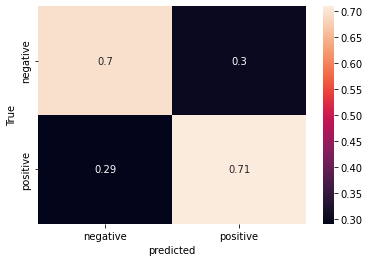

In [8]:
def get_predictions(estimator, input_fn):
  return [x['class_ids'][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = ['negative', 'positive']

# create a confusion matrix on training data
cm = tf.math.confusion_matrix(train_df['polarity'],
                              get_predictions(estimator, predict_train_input_fn))

# normalize confusion matrix 
cm = tf.cast(cm, dtype=tf.float32)

cm = cm/tf.math.reduce_sum(cm,axis=1)[:,np.newaxis]

sns.heatmap(cm, annot=True, xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel('predicted')
plt.ylabel('True')